# 3. Cook's Distance
- 잔차가 큰 outlier 중에서, leverage도 큰 데이터

$$ D_i = \dfrac{r_i^2}{RSS} \left[\dfrac{h_{ii}}{(1-h_{ii})^2}\right] $$


- Fox' Outlier Recommendation

$$ D_i > \dfrac{4}{N-K-1}$$

- code:
    - `sm.graphics.plot_leverage_reside2(result)`: 레버리지와 잔차
    - `sm.graphics.influence_plot(result)`: Cook's distance 버블크기
    - `sm.get_influence`: 영향도 객체
      - `hat_matrix_diag`: 영향도 객체의 레버리지 값(멤버변수)
      - `cook_distance`: 영향도 객체의 쿡의 거리 값(멤버변수)
    - `sm.graphics.abline_plot`: 회귀식 플롯
    

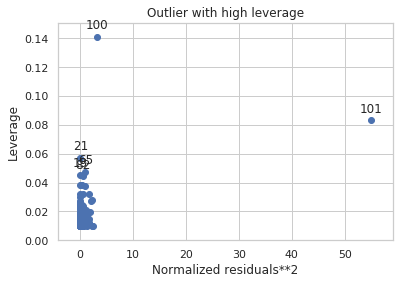

In [235]:
# 레버리지와 잔차 동시에 보여줌
# 레버리지가 큰 아웃라이어는 idx나옴
f, ax = plt.subplots()
sm.graphics.plot_leverage_resid2(result, ax=ax)
ax.set_title("Outlier with high leverage")
plt.show()

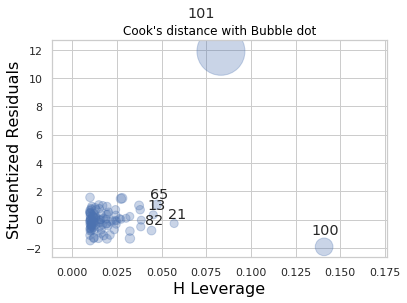

In [236]:
# bubble 크기 = Cook's distance
f, ax = plt.subplots()
sm.graphics.influence_plot(result, plot_alpha=0.3, ax=ax)
ax.set_title("Cook's distance with Bubble dot")
plt.show()

사용해야 할 툴

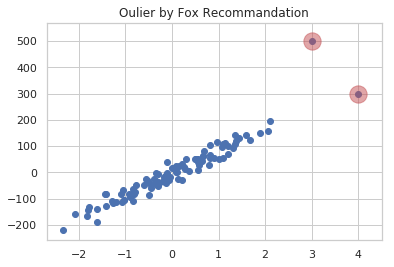

In [227]:
# fox' recommadation에 의한 아웃라이어
# np.where로 idx 찾아냄
cook_d, pvals = influence.cooks_distance
fox_rc = 4 / (len(y) - 2 -1)
idx = np.where(cook_d > fox_rc)[0]

ax = plt.subplot()
plt.scatter(df.X, df.Y)
plt.scatter(df.X[idx], df.Y[idx], s=300, c='r', alpha=0.5)
plt.title("Oulier by Fox Recommandation")
plt.show()

------ 이하 Cook's distance를 위한 배경지식

## 1. 레버리지
- $y_i$가 $\hat{y}_i$에 미치는 영향을 나타냄(예측점을 자기 위치로 당기는 정도)
- 영향도 행렬($\hat{y}=Hy$의 H)의 대각성분 $h_{ii}$성분으로 정의됨
$$\hat{y}_i = h_{i1}y_1 + \cdots + h_{ii}y_i + \cdots + h_{iN}y_N$$
- 레버리지 값 $h_{ii}$의 성질
    - 1) $0 \leq h_{ii} \leq 1$
    - 2) $tr(H) = \sum_i^N h_{ii}=K$ (N개 레버리지 합 = 모수 갯수 K)
         - 대각성분이 모두 1이 될 수 없음
         - $(\because)$ Data갯수 = N, 피쳐+1 = K
    - 3) 레버리지의 평균: $h_{ii} \approx \dfrac{K}{N} \rightarrow$ 평균값의 2 ~ 4 배이면 레버리지 큰 것

In [182]:
%matplotlib inline
from sklearn.datasets import make_regression
X0, y, coef = make_regression(n_samples=100, n_features=1, noise=20,\
                             coef=True)

data_100, data_101 = (4, 300), (3, 500)
nx = np.array([data_100[:1], data_101[:1]])
ny = np.array([data_100[1:], data_101[1:]])

X, Y = np.vstack([X0, nx]), np.vstack([y.reshape((100,1)), ny])
df = pd.DataFrame({'X': X[:, 0], 'Y': Y[:, 0]})

In [183]:
import statsmodels.api as sm
model = sm.OLS.from_formula('Y ~ X', data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     951.5
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           6.79e-53
Time:                        01:54:32   Log-Likelihood:                -496.51
No. Observations:                 102   AIC:                             997.0
Df Residuals:                     100   BIC:                             1002.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5644      3.148     -0.497      0.6

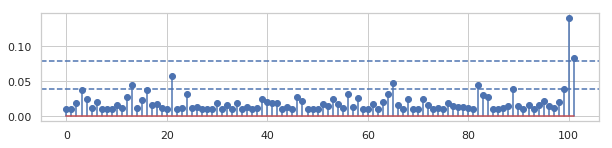

In [189]:
# get_influence(): 영향도의 정보 객체
# hat_matrix_diag: 레버리지 벡터 값
influence = result.get_influence()
hat = influence.hat_matrix_diag

# 이상 데이터 빼고 정상 수준의 레버리지 평균은 0.01
plt.figure(figsize=(10, 2))
plt.stem(hat)
plt.axhline(hat.sum()/102 * 2, ls='--')
plt.axhline(hat.sum()/102 * 4, ls='--')
plt.show()

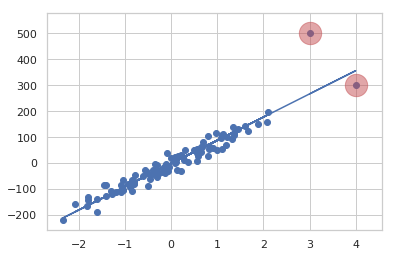

In [188]:
# 레버리지 큰 실제y 값 찾기
# plt.scatter(df.X, df.Y)
# sm.graphics.abline_plot(model_results=result)
plt.scatter(df.X, df.Y)
plt.plot(df.X, result.fittedvalues)

idx = hat > hat.sum()/102 * 4
plt.scatter(df.X[idx], df.Y[idx], s=500, c='r', alpha=0.5)
plt.show()

# 2. 아웃라이어
- 잔차가 큰 데이터
- 표준화 잔차 필요

## 2.1 표준화 잔차 standardized residual
- 잔차를 leverage와 std로 나누어 동일한 std 가지도록 스케일링
$$ r_i = \dfrac{e_i}{s \sqrt{1-h_{ii}}} $$
- 표준화 잔차가 2 ~ 4보다 크면 outlier

실습

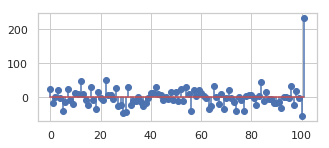

In [203]:
plt.figure(figsize=(5, 2))
plt.stem(result.resid)
plt.show()

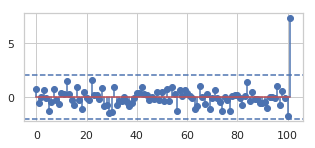

In [204]:
# 표준화 잔차
plt.figure(figsize=(5, 2))
plt.stem(result.resid_pearson)
plt.axhline(2, ls='--')
plt.axhline(-2, ls='--')
plt.show()